<a href="https://colab.research.google.com/github/rizwanhaidar/ADVANCED-ENCRYPTION-STANDARD-AES--128-bits/blob/master/VDA_Assignment_3_Exercise_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VDA Assignment 3
## Group Members
#### Maaz Asad (s65masad)
#### Maria Yasir (s09myasi)
#### Rizwan Haidar (s83rhaid)



Following are the imported libraries used for this assignment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import types
import warnings
warnings.filterwarnings('ignore')
import os

# Exercise 3

## Principal Component Analysis, 17 Points




### a) Read the breast-cancer-wisconsin.xlsx file. Note that there are some instances with missing data, which have to be imputed before we can run PCA. Pandas offers convenient functions for this. Apply an imputation method that makes sense for this dataset, and briefly explain your decision. (3P)

In [2]:
df = pd.read_excel("breast-cancer-wisconsin.xlsx")

In [3]:
df.head()

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
df['class'] = df['class'].replace({2: 'benign', 4: 'malignant'})

In [5]:
df.sample(n=6)

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
509,1297522,2,1,1,1,2,1.0,1,1,1,benign
400,1211265,3,10,8,7,6,9.0,9,3,8,malignant
196,1213375,8,4,4,5,4,7.0,7,8,2,benign
299,63375,9,1,2,6,4,10.0,7,7,2,malignant
418,1240337,5,2,2,2,2,2.0,3,2,2,benign
544,1186936,2,1,3,2,2,1.0,2,1,1,benign


In [6]:
df.columns[df.isna().any()].tolist()

['bareNuc']

In [7]:
df = df.fillna(df.median(numeric_only=True))


In [8]:
df.columns[df.isna().any()].tolist()

[]

### Explaination for using median


### b) Create a plot that, for any number n, shows what fraction of the overall variance in the data is contained in the first n principal components. Make sure that you only include the nine relevant numerical attributes in the PCA, not the sample codes or class IDs. How many components do we need to cover ≥ 90% of the variance? (5P) Hint: You may use the implementation of PCA that is provided in the Python package scikit-learn.


In [9]:
df_new = df.drop(columns = ['class','code'])

df_new.head()

,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [10]:
pca = PCA()
pca.fit(df_new)

PCA()

In [11]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

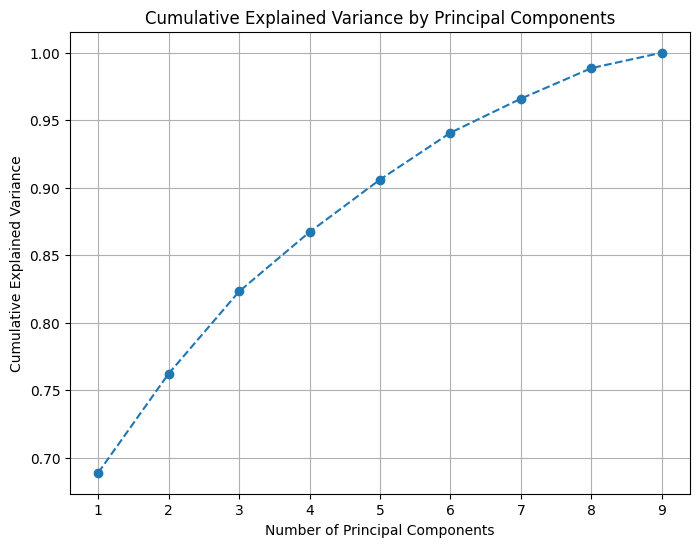

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [13]:
n_components_90 = next(i for i, v in enumerate(cumulative_variance) if v >= 0.90) + 1
print("Number of components needed to cover ≥ 90% of the variance: ",n_components_90)

Number of components needed to cover ≥ 90% of the variance:  5


###  c) Each sample is now characterized by a point in PCA space. Create a scatter plot matrix that shows the first five principal components. Each diagonal cell should contain two overlaid density plots, one for the benign and one for the malignant class. Use different colors to distinguish between the classes, and add a legend that clearly states which samples are benign or malignant. (3P)

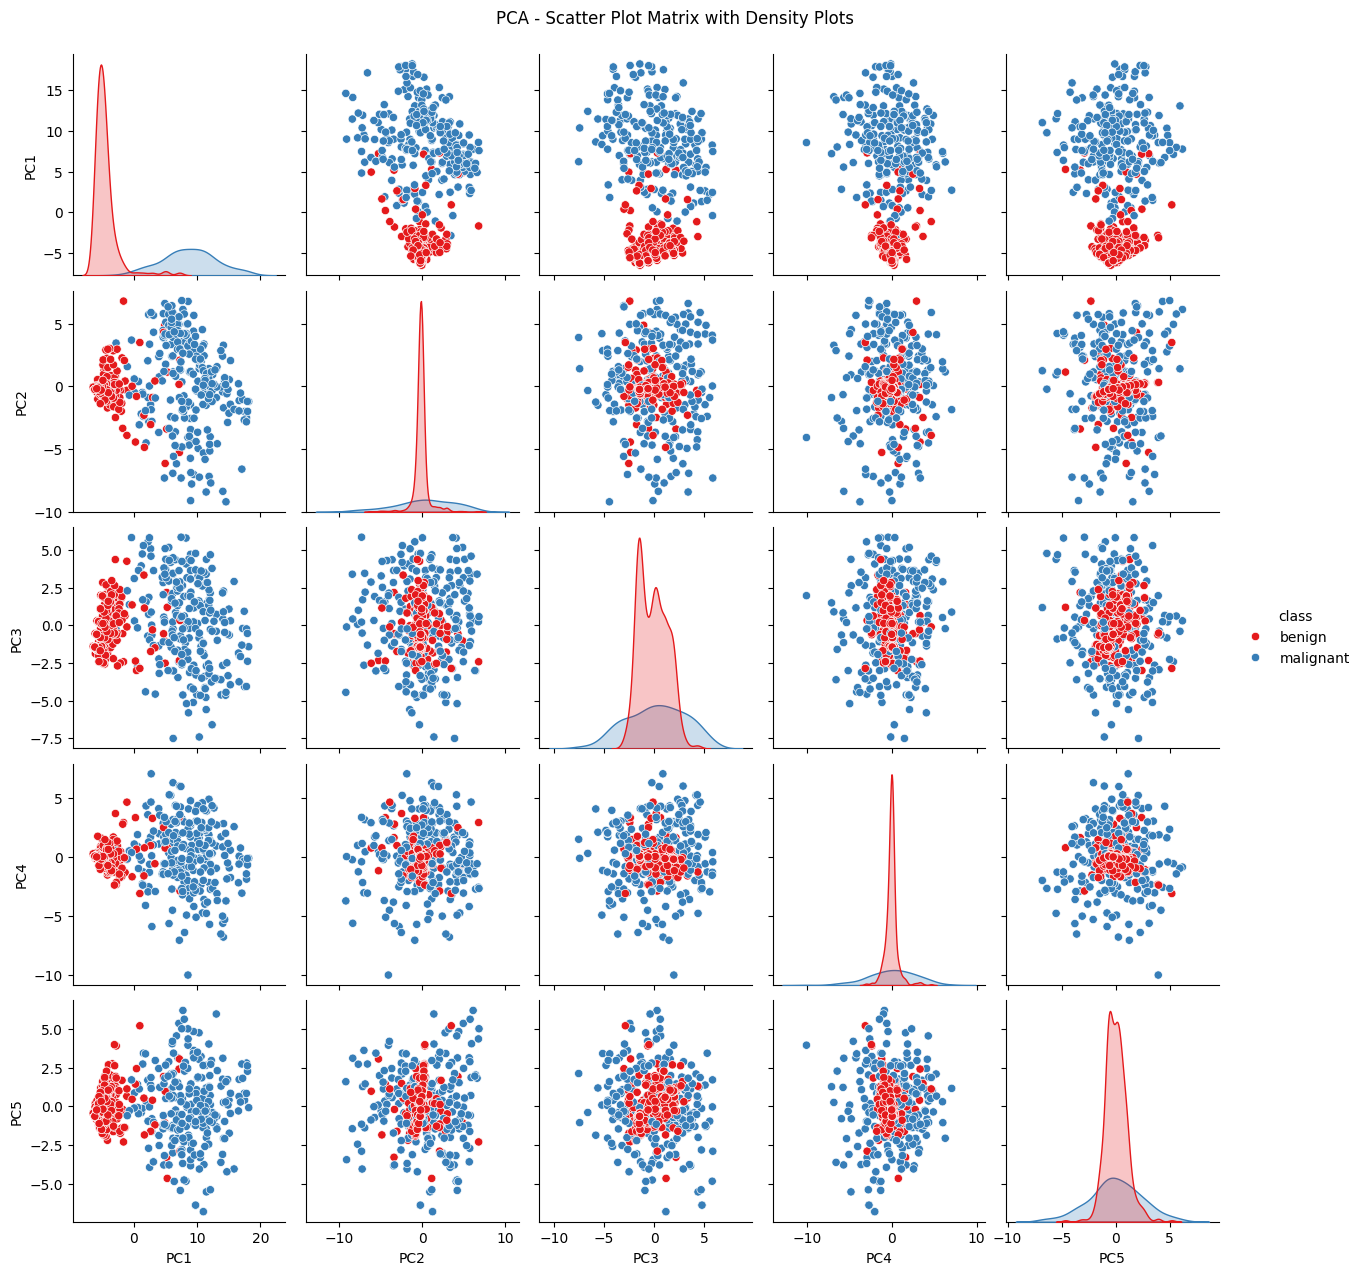

In [14]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_new)

# DataFrame with the principal components and add the target class
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(5)])
pca_df['class'] = df['class']  # Assuming the target column is named 'class'

# pairplot with density plots on the diagonal
sns.pairplot(pca_df, hue='class', diag_kind='kde', palette='Set1')

# titles and adjust the legend
plt.suptitle("PCA - Scatter Plot Matrix with Density Plots", y=1.02)

plt.show()

### d) Which PCA mode shows the strongest difference between the benign and the malignant samples? Name the original variables that have the highest and lowest weights in its definition, respectively. (3P)

In [15]:
loadings = pca.components_[0]
feature_names = df_new.columns

weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': loadings})

highest = weights_df.iloc[0]
lowest = weights_df.iloc[-1]

print("Highest Weight:")
print(highest['Feature'] , ': ', highest['Weight'])
print()

print("Lowest Weight:")
print(lowest['Feature'] , ': ', lowest['Weight'])

Highest Weight:
thickness :  0.2983261033654141

Lowest Weight:
mitoses :  0.12370013698990312


PC1 shows the strongest difference between benign and malignant samples.

The feature with highest weight is **thickness** with a weight of aprox 0.2983

The feature with lowest weight is **mitoses** with a weight of aprox 0.1237


###  e) In the breast cancer dataset, all variables xi have a similar range, xi ∈ [1,10]. If the variables of a dataset have very different ranges, for example one variable x1 ∈ [1000,2000] and another one x2 ∈ [1,5], how would this affect the PCA? Could it make sense to pre-process the data in such cases? Why and how? (3P)

PCA is scale-sensitive

PCA identifies the principal components in the feature space using covariance between the features.

If the dataset has features with very different scales, then PCA will be biased towards the features with larger variances or scale as variables with larger numeric ranges contribute more to the total variance.

Even if x2 has a stronger pattern it may be ignored because of its small numeric range.

To over come this we can standardize the scales to prevent biase.
We can make use of *StandardScalar* function provided in the *sklearn* library which transforms each feature such that its mean = 0 and Standard Deviation = 1.

# Exercise 4
## (Data Standardization Before PCA, 10 Points)

###  a) Create a scatter plot of the data. To ensure that distances in the plot reflect the distances that PCA accounts for, set the axis aspect ratio to one. Perform PCA on the data and plot the two principal components next to the original scatter plot, again with an axis aspect ratio of one. Also visualize the cumulative explained variance and the contributions of each variable to the principal components. (3P)

In [16]:
df = pd.read_csv('SOCR-HeightWeight_small.csv')

In [17]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,70.09805,138.9394
2,68.68038,120.6936
3,63.62233,107.4236
4,70.05146,134.6655


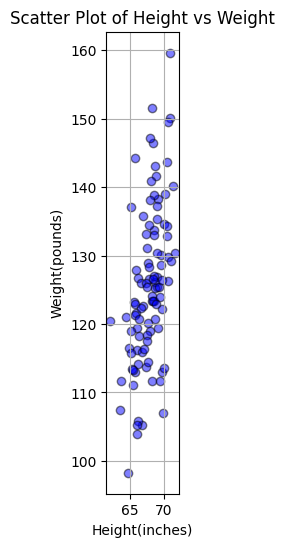

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Height(Inches)'], df['Weight(Pounds)'], alpha=0.5, c='blue', edgecolor='k')
plt.xlabel('Height(inches)')
plt.ylabel('Weight(pounds)')
plt.title('Scatter Plot of Height vs Weight')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


In [19]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

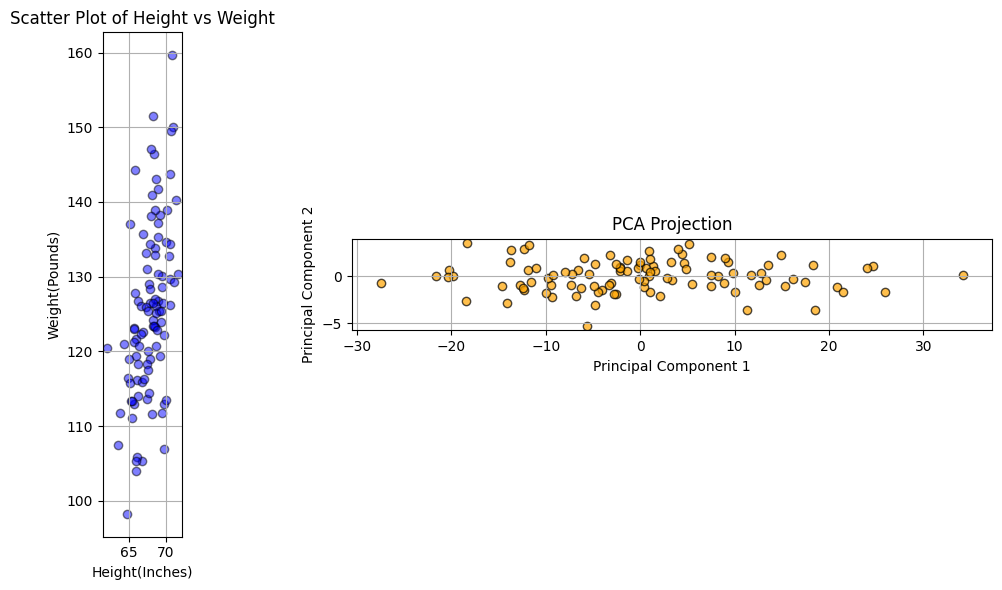

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original Scatter Plot

axs[0].scatter(df['Height(Inches)'], df['Weight(Pounds)'], alpha=0.5, c='blue', edgecolor='k')
axs[0].set_xlabel('Height(Inches)')
axs[0].set_ylabel('Weight(Pounds)')
axs[0].set_title('Scatter Plot of Height vs Weight')
axs[0].set_aspect('equal', adjustable='box')
axs[0].grid(True)


# PCA Scatter Plot
axs[1].scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7, c='orange', edgecolor='k')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title("PCA Projection")
axs[1].set_aspect('equal', adjustable='box')
axs[1].grid(True)

plt.tight_layout()
plt.show()

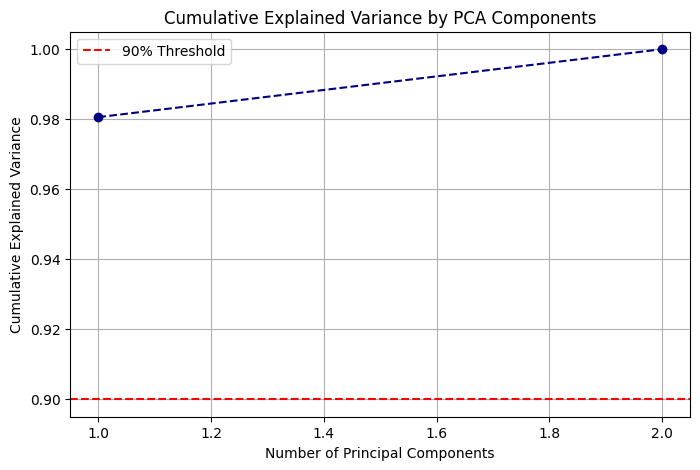

In [21]:
# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='navy')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.legend()
plt.show()

###  b) Convert the given US units (inches and pounds) to metric units (m and kg). Re-create the same plots as in a) and describe your observations. (2P)

In [22]:
df_metric = df.copy()

# Converting height from inches to meters
df_metric['Height_m'] = df['Height(Inches)'] * 0.0254

# Converting weight from pounds to kilograms
df_metric['Weight_kg'] = df['Weight(Pounds)'] * 0.453592

# Optionally droping the original US columns
df_metric.drop(['Height(Inches)', 'Weight(Pounds)'], axis=1, inplace=True)


print(df_metric.head())

   Height_m  Weight_kg
0  1.670896  51.252494
1  1.780490  63.021800
2  1.744482  54.745651
3  1.616007  48.726486
4  1.779307  61.083193


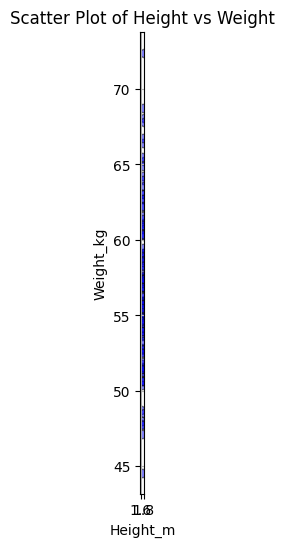

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df_metric['Height_m'], df_metric['Weight_kg'], alpha=0.5, c='blue', edgecolor='k')
plt.xlabel('Height_m')
plt.ylabel('Weight_kg')
plt.title('Scatter Plot of Height vs Weight')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


setting axis aspect ratio yeilds an unreadable plot. Therefore plotting without setting the aspect ratio

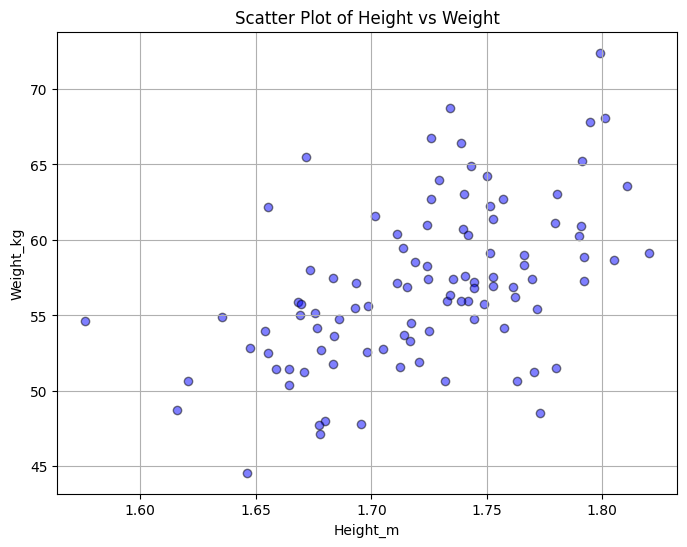

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df_metric['Height_m'], df_metric['Weight_kg'], alpha=0.5, c='blue', edgecolor='k')
plt.xlabel('Height_m')
plt.ylabel('Weight_kg')
plt.title('Scatter Plot of Height vs Weight')
# plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [25]:
pca = PCA(n_components=2)
df_metric_pca = pca.fit_transform(df_metric)

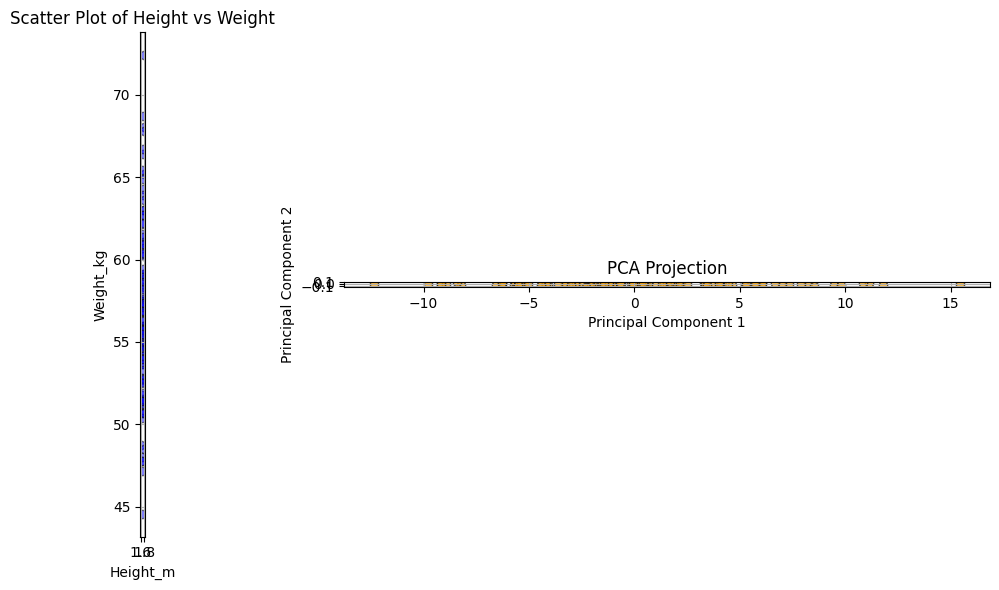

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original Scatter Plot

axs[0].scatter(df_metric['Height_m'], df_metric['Weight_kg'], alpha=0.5, c='blue', edgecolor='k')
axs[0].set_xlabel('Height_m')
axs[0].set_ylabel('Weight_kg')
axs[0].set_title('Scatter Plot of Height vs Weight')
axs[0].set_aspect('equal', adjustable='box')
axs[0].grid(True)


# PCA Scatter Plot
axs[1].scatter(df_metric_pca[:, 0], df_metric_pca[:, 1], alpha=0.7, c='orange', edgecolor='k')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title("PCA Projection")
axs[1].set_aspect('equal', adjustable='box')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Similar probelm seen here.

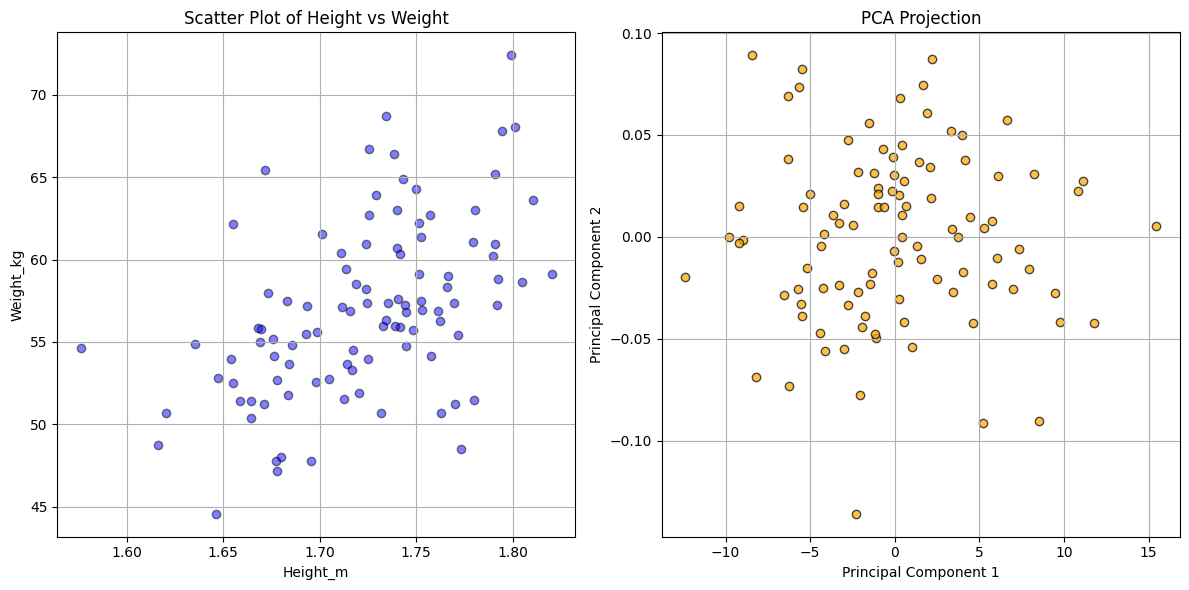

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original Scatter Plot

axs[0].scatter(df_metric['Height_m'], df_metric['Weight_kg'], alpha=0.5, c='blue', edgecolor='k')
axs[0].set_xlabel('Height_m')
axs[0].set_ylabel('Weight_kg')
axs[0].set_title('Scatter Plot of Height vs Weight')
# axs[0].set_aspect('equal', adjustable='box')
axs[0].grid(True)


# PCA Scatter Plot
axs[1].scatter(df_metric_pca[:, 0], df_metric_pca[:, 1], alpha=0.7, c='orange', edgecolor='k')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title("PCA Projection")
# axs[1].set_aspect('equal', adjustable='box')
axs[1].grid(True)

plt.tight_layout()
plt.show()

After converting to metric system we can see that the values are very much closeer to each other there for the plots using metric values and adjusting the axis aspect ratio renders the plots unreadable.
Looking at the PCA project plot we can also observe that the

###  c) Re-create the same two plots after standardizing the data to zero mean and unit variance in each attribute. How does this affect the PCA? Does it still matter which units have been used originally? (2P)

In [28]:
df_US_scaled = StandardScaler().fit_transform(df)
df_metric_scaled = StandardScaler().fit_transform(df_metric)

pca = PCA(n_components=2)
df_US_scaled_pca = pca.fit_transform(df_US_scaled)
df_metric_scaled_pca= pca.fit_transform(df_metric_scaled)

In [29]:
print(df_US_scaled[0])

[-1.07379683 -1.08292423]


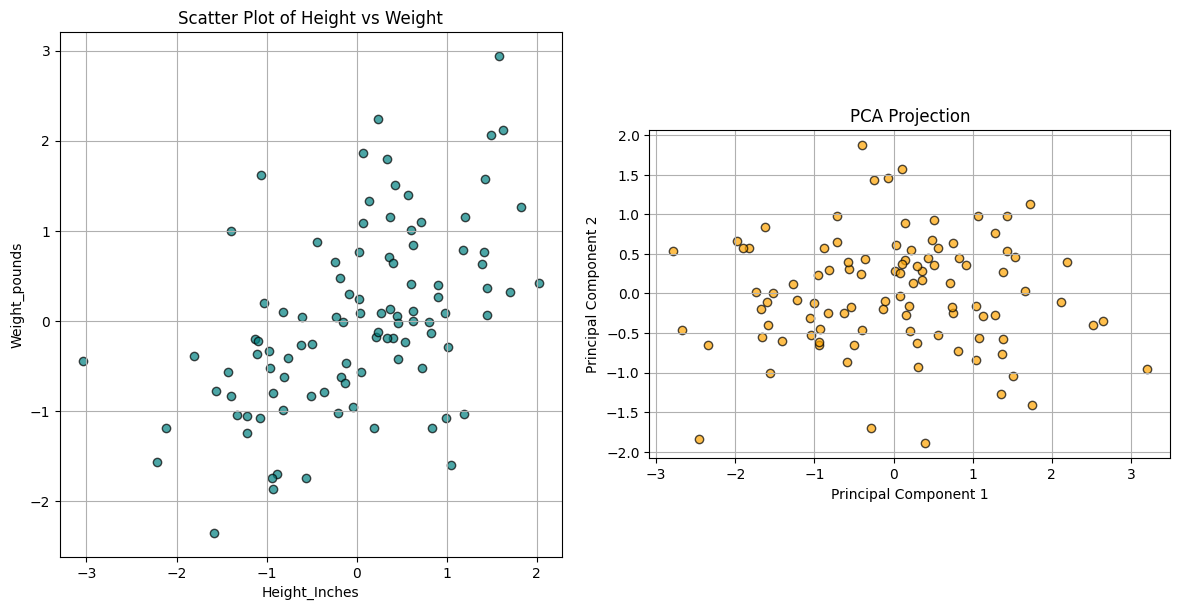

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original Scatter Plot
axs[0].scatter(df_US_scaled[:, 0], df_US_scaled[:, 1], alpha=0.7, c='teal', edgecolor='k')
axs[0].set_xlabel('Height_Inches')
axs[0].set_ylabel('Weight_pounds')
axs[0].set_title('Scatter Plot of Height vs Weight')
axs[0].set_aspect('equal', adjustable='box')
axs[0].grid(True)


# PCA Scatter Plot
axs[1].scatter(df_US_scaled_pca[:, 0], df_US_scaled_pca[:, 1], alpha=0.7, c='orange', edgecolor='k')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title("PCA Projection")
axs[1].set_aspect('equal', adjustable='box')
axs[1].grid(True)

plt.tight_layout()
plt.show()

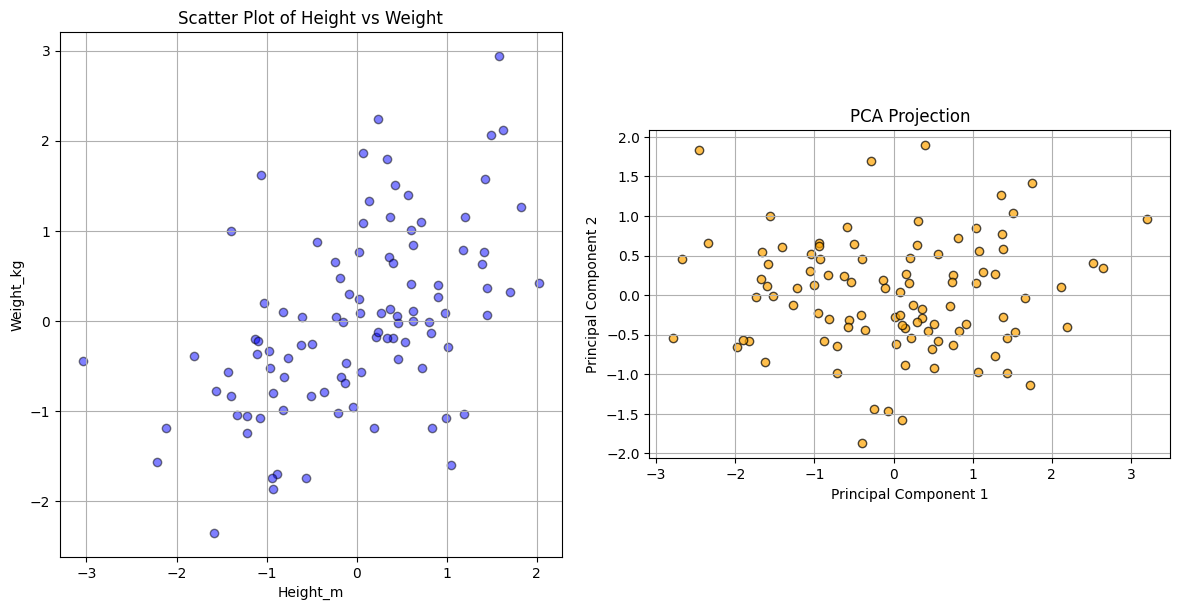

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original Scatter Plot

axs[0].scatter(df_metric_scaled[:, 0], df_metric_scaled[:, 1], alpha=0.5, c='blue', edgecolor='k')
axs[0].set_xlabel('Height_m')
axs[0].set_ylabel('Weight_kg')
axs[0].set_title('Scatter Plot of Height vs Weight')
axs[0].set_aspect('equal', adjustable='box')
axs[0].grid(True)


# PCA Scatter Plot
axs[1].scatter(df_metric_scaled_pca[:, 0], df_metric_scaled_pca[:, 1], alpha=0.7, c='orange', edgecolor='k')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title("PCA Projection")
axs[1].set_aspect('equal', adjustable='box')
axs[1].grid(True)

plt.tight_layout()
plt.show()

###  d) Would you recommend standardization before PCA in this case? Justify your answer. (1P)

Yes, Standardization is recommended in this case.
We can see that the range of values for height is very narrow as compared to the weight. This effects the PCA as it is dependent on the covariance of the values.
Standardization either in the US values or the metric values is highly recommended with this data set.

###  e) For the following two scenarios, discuss the effects of standardization. Can you give a clear recommendation? Justify your answers:

*    Students rate the difficulty of a lecture and corresponding exercises on a scale of 1-10. For the lecture, most students give scores in the 4-6 range. For the exercises, some find them much more difficult than others, so we have a much wider spread of values between 1-10. We aim to compute a principal component that allows us to rank students with respect to how difficult they found the module overall. (1P)






**Ans)**

*   The length of various bones is measured on a common scale (in cm) in healthy subjects and patients in which the growth of certain bones has been affected. We aim to compute an embedding in which patients form distinct clusters. (1P)

**Ans)**